In [17]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

/home/sonvq9699/Projects/DLWithPytorch/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sonvq9699/Projects/DLWithPytorch/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/sonvq9699/.cache/torch/hub/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variabl

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.base_transform(img)

In [4]:
!ls

download.jpeg			      main.py
L3_build_model.ipynb		      pytorch_basic_2.ipynb
L4_build_model_by_nnSequential.ipynb  pytorch_basic.ipynb
L5_img_classification.ipynb


In [6]:
# !mkdir data
# !mv download.jpeg data

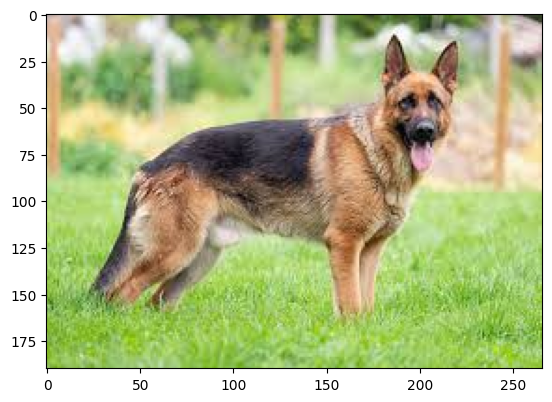

In [11]:
image_file_path = "./data/download.jpeg"
img = Image.open(image_file_path)
plt.imshow(img)
plt.show()

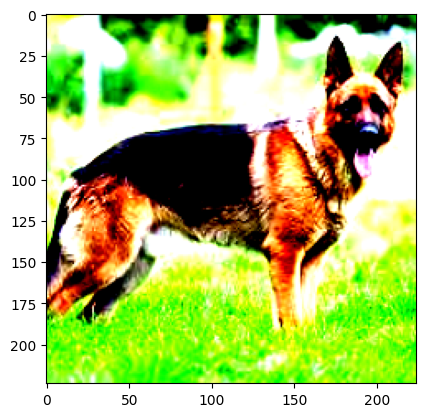

In [13]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)

In [14]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]
        return predicted_label_name

In [15]:
!ls

data				      L5_img_classification.ipynb
imagenet_class_index.json	      main.py
L3_build_model.ipynb		      pytorch_basic_2.ipynb
L4_build_model_by_nnSequential.ipynb  pytorch_basic.ipynb


In [18]:
class_index = json.load(open('imagenet_class_index.json'))

In [19]:
predictor = Predictor(class_index)

In [23]:
img_file_path = './data/download.jpeg'
img = Image.open(img_file_path)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)
# img_transformed.shape
out = net(img_transformed)
result = predictor.predict_max(out)
print(result)

['n02106662', 'German_shepherd']
